# Soccer Pass Map in Python

In [5]:
#! pip install mplsoccer

In [29]:
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
from mplsoccer import Pitch

In [30]:
df = pd.read_csv("messibetis.csv")
df["Successful"] = np.where(df["outcome"] == "Successful", True, False)
df["x"] = df["x"]*1.2
df["y"] = df["y"]*0.8
df["endX"] = df["endX"]*1.2
df["endY"] = df["endY"]*0.8
df.head()

,player,minute,second,x,y,type,outcome,endX,endY,Successful
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4,True
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4,True
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0,True
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4,True
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4,False


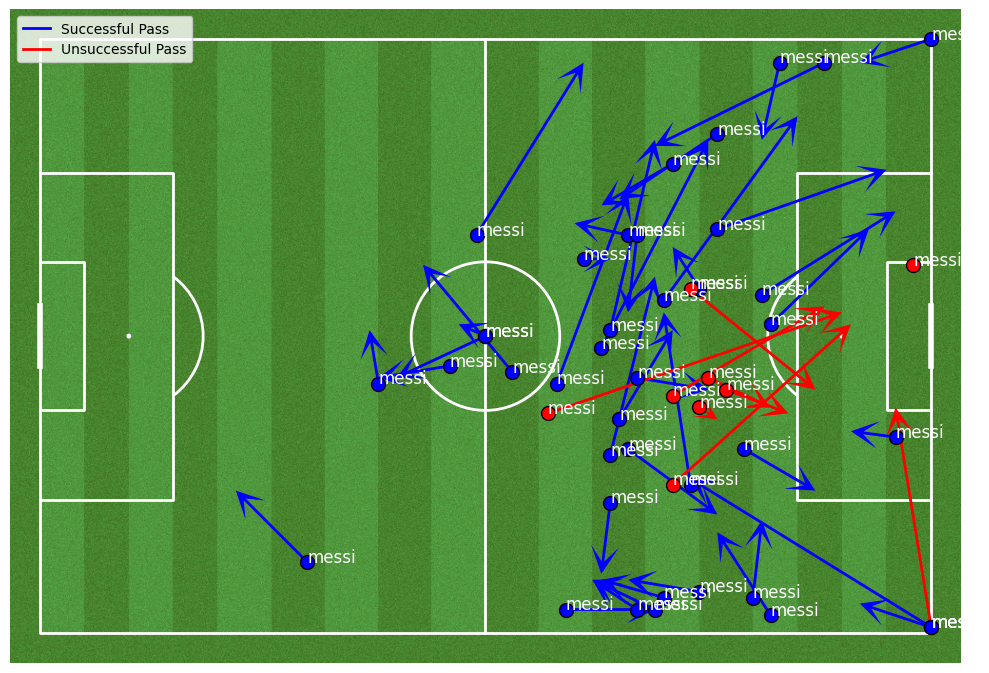

In [31]:
# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True)

# Create a figure
fig, ax = pitch.draw(figsize=(10, 7))
#ax.invert_xaxis()
ax.invert_yaxis()
# Plot each pass
for _, row in df.iterrows():
    color = 'blue' if row['Successful'] else 'red'
    pitch.arrows(row['x'], row['y'], row['endX'], row['endY'], width=2, headwidth=10, headlength=10, color=color, ax=ax)
    ax.scatter(row['x'], row['y'], color=color, edgecolor='black', s=100, zorder=2)
    ax.text(row['x'], row['y'], row['player'], fontsize=12, color='white', zorder=3)

# Create a legend
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Successful Pass'),
    Line2D([0], [0], color='red', lw=2, label='Unsuccessful Pass')
]
ax.legend(handles=legend_elements, loc='upper left')